<a href="https://colab.research.google.com/github/dhcryan/kaggle_challenge_/blob/main/week5/kbo_donghun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 외국인 투수의 스카우팅을 위한 최적화 경진대회
- Time series, Recommendation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq '/content/drive/MyDrive/kaggle/68346_KBO_foreign_pitcher_data.zip'

In [3]:
import matplotlib
import pandas as pd
import numpy as sns
import seaborn as sns
import statsmodels.api as sm
print(matplotlib.__version__) 

3.2.2


## **EDA 간단한 분석**

### KBO/팬그래프 데이터

In [4]:
import pandas as pd

#데이터셋 불러오기 
atKbo_11_18_KboRegSsn = pd.read_csv("kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("fangraphs_foreigners_2011_2018.csv")

# 신규 외국인 투수 MLB 성적
atKbo_19_MlbTot = pd.read_csv("fangraphs_foreigners_2019.csv")

In [5]:
print(atKbo_11_18_KboRegSsn.shape)
print(atKbo_11_18_MlbTot.shape)
print(atKbo_19_MlbTot.shape)

(105, 11)
(205, 19)
(41, 19)


MLB기록들은 연도에 상관없이 feature가 19개, 행의 수만 다르다.

In [6]:
print(atKbo_11_18_KboRegSsn.columns)
print(atKbo_11_18_MlbTot.columns)
print(atKbo_19_MlbTot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


kbo리그에서의 성적을 살펴봅시다(11-18시즌)

,ERA,TBF
count,105.000000,105.000000
mean,4.714286,558.980952
std,1.733072,224.436816
min,2.380000,40.000000
25%,3.740000,349.000000
50%,4.420000,622.000000
75%,5.230000,758.000000
max,15.750000,870.000000


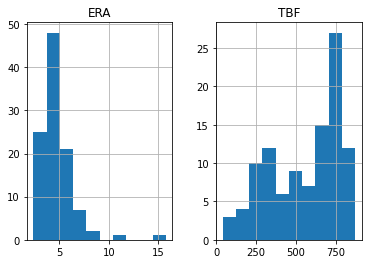

In [7]:
atKbo_11_18_KboRegSsn[['ERA','TBF']].hist()
atKbo_11_18_KboRegSsn[['ERA','TBF']].describe()

mlb에서의 성적을 살펴봅시다

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


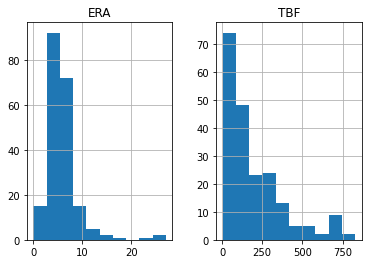

In [8]:
atKbo_11_18_MlbTot[['ERA', 'TBF']].hist()
print(atKbo_11_18_MlbTot[['ERA', 'TBF']].describe())

`groupby` 함수를 통해 투수별로 묶어준 뒤에 era의 평균값 구해준다

In [9]:
m_mean=(atKbo_11_18_MlbTot.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'MLB_mean'}))
k_mean=(atKbo_11_18_KboRegSsn.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'KBO_mean'}))
df=pd.merge(m_mean,k_mean,how='inner',on='pitcher_name')
df

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.687500
1,다이아몬드,10.262500,4.420000
2,듀브론트,5.106667,4.920000
3,레나도,7.306667,6.800000
4,레온,6.050000,11.250000
5,레이예스,12.956667,5.695000
6,레일리,6.640000,4.197500
7,로저스,5.771667,3.690000
8,루카스,5.687143,4.930000
9,리즈,4.240000,3.543333


데이터 간의 관계를 살펴보자

          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


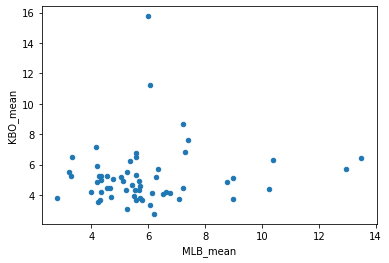

In [10]:
df.plot(kind='scatter',x='MLB_mean',y='KBO_mean')
print(df.corr())

ERA 만으로는 KBO에서의 투수 활약을 예측하기는 어렵다

### statcast data를 통한 야구 지표 분석

In [11]:
atKbo_11_18_StatCast = pd.read_csv("baseball_savant_foreigners_2011_2018.csv")
atKbo_19_StatCast = pd.read_csv("baseball_savant_foreigners_2019.csv")
print(atKbo_11_18_StatCast.shape)
print(atKbo_19_StatCast.shape)

(135753, 24)
(21903, 24)


구질 데이터가 있어서 24개의 column으로 구성됨

In [12]:
print(atKbo_11_18_StatCast.columns)
print(atKbo_19_StatCast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [13]:
atKbo_11_18_StatCast.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135753 entries, 0 to 135752
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_date          135753 non-null  object 
 1   release_speed      135534 non-null  float64
 2   batter             135684 non-null  float64
 3   pitcher            135753 non-null  int64  
 4   events             35707 non-null   object 
 5   description        135753 non-null  object 
 6   zone               135534 non-null  float64
 7   stand              135753 non-null  object 
 8   p_throws           135753 non-null  object 
 9   bb_type            26575 non-null   object 
 10  balls              135753 non-null  int64  
 11  strikes            135753 non-null  int64  
 12  pfx_x              135534 non-null  float64
 13  pfx_z              135534 non-null  float64
 14  plate_x            135534 non-null  float64
 15  plate_z            135534 non-null  float64
 16  ax

<ipython-input-13-0a3d66cfb85b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  atKbo_11_18_StatCast.info(null_counts=True)


이 중에서 문자열 데이터인 events, description, pitch name에 주목

타석에 대한 결과 :  events

nan이 많겠죠

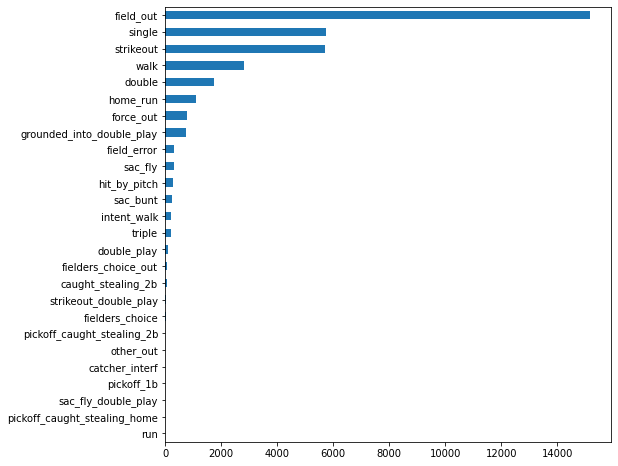

In [14]:
atKbo_11_18_StatCast['events'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

description : 공의 결과

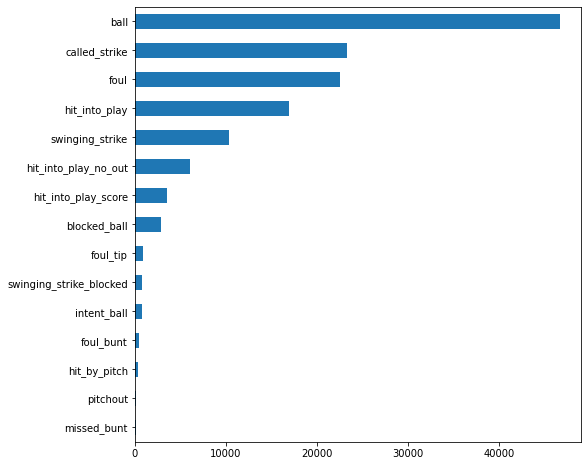

In [15]:
atKbo_11_18_StatCast['description'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

pitch name : 구질

4-seam fastball이 많음

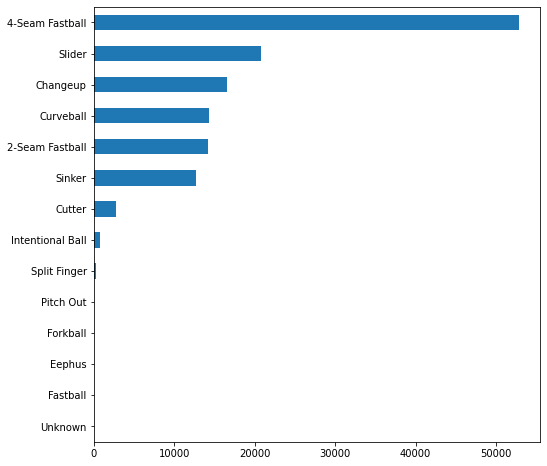

In [16]:
atKbo_11_18_StatCast['pitch_name'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

## **전처리**

### target 데이터 및 kbo에서의 첫 해 성적 추출

In [17]:
import pandas as pd

#kbo에서의 투수 성적
atKbo_11_18_KboRegSsn = pd.read_csv("kbo_yearly_foreigners_2011_2018.csv")
#mlb에서의 투수 성적
atKbo_11_18_MlbTot = pd.read_csv("fangraphs_foreigners_2011_2018.csv")
#kbo에서의 투구별 속성
atKbo_11_18_StatCast = pd.read_csv("baseball_savant_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("fangraphs_foreigners_2019.csv")

atKbo_19_StatCast = pd.read_csv("baseball_savant_foreigners_2019.csv")

**KBO, MLB, statcast 모두에 등록된 데이터가 필요하다(target 집단 설정)**

In [18]:
target=(set(atKbo_11_18_KboRegSsn['pitcher_name'])&
        set(atKbo_11_18_MlbTot['pitcher_name'])&
        set(atKbo_11_18_StatCast['pitcher_name']))
print(type(target))

<class 'set'>


이렇게 KBO, MLB, 스랫캐스트 데이터에 기록이 존재히는 타깃 집단이 추출됐습니다.

In [19]:
target=sorted(list(target))
len(target)

57

- year값이 가장 작은 인덱스를 추출해 변수에 저장
- 즉, kbo에서의 첫해 성적을 추출

In [20]:
# @통해 변수에 접근 가능
_idx=atKbo_11_18_KboRegSsn.query('pitcher_name in @target').groupby('pitcher_name')['year'].idxmin().values
firstYearInKBO_11_18=atKbo_11_18_KboRegSsn.loc[_idx,:]
firstYearInKBO_11_18.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN
10,레나도,2017,삼성,6.80,243,70,11,27,6,28,NaN
11,레온,2016,삼성,11.25,40,16,2,1,1,7,NaN


### 유효한 데이터 산정하기

평균자책점(ERA) 이 중요한 데이터이긴 한데 투수가 상대한 타자의 수(TBF)에 영향을 받는 지표이다.

In [21]:
# kbo 첫 시즌에서 어느 정도 이닝도 먹어주면서 평균자책점도 낮은 선수들
TBF_median=firstYearInKBO_11_18['TBF'].median()
ERA_median=firstYearInKBO_11_18['ERA'].median()
Elite_11_18=firstYearInKBO_11_18.query('TBF >=@TBF_median & ERA<=@ERA_median')
Elite_11_18

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN
14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일
25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일
37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN
43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN
45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN
48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN
67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN


In [22]:
len(Elite_11_18)

18

## **모델 구축과 검증**

- MLB데이터를 통하여 투수의 능력을 평가하는 제구력 지표와 아웃 확률 산출하는 모델을 만들 것임

- 해당 지표를 통해 투수들의 순위를 매긴 후 가장 높은 투수를 영입

### 제구력과 ERA간의 관계

- 미국에서의 팬그래프 데이터 : 연도별 통계 지표로는 고유 능력을 밝혀내기 쉽지 않음

- 다만 투수의 제구력은 투수 고유의 능력임(statcast data)

- 공이 홈 플레이트를 지날 때 위치를 시각화 해보자

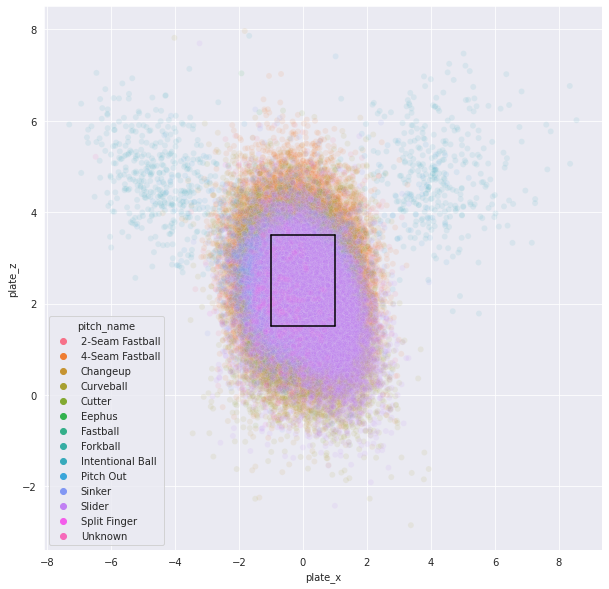

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name'),x='plate_x',y='plate_z',hue='pitch_name',alpha=0.1)
#(x1,x2) -> (y1,y2)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')

plt.show()

- 그 중에서 `called_strike` 만 시각화해보자

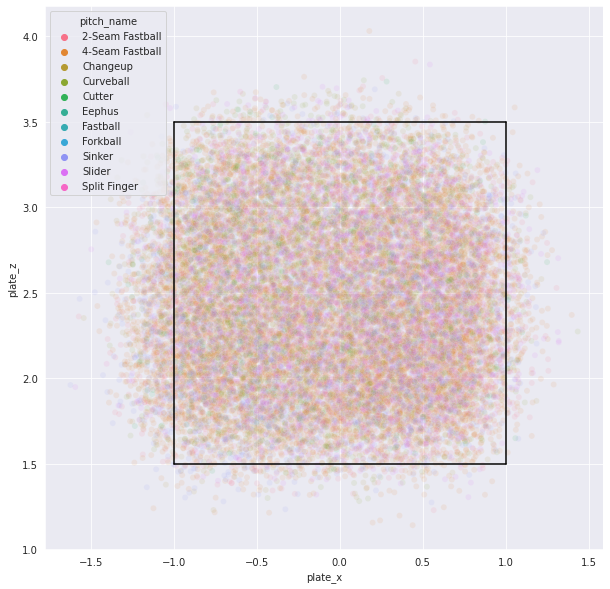

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name').\
                query('description=="called_strike"'),x='plate_x',y='plate_z',hue='pitch_name',alpha=0.1)
#(x1,x2) -> (y1,y2)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')

plt.show()

In [25]:
# atKbo_11_18_StatCast['pitch_name'].isna().sum()

- 어떤 게 제구력이 좋은 것일까? 스트라이크 존의 가장자리에 꽂히는 구종이 많은 투수가 좋은 투수

- 가장자리 : 측면당 strike 존 크기의 20퍼

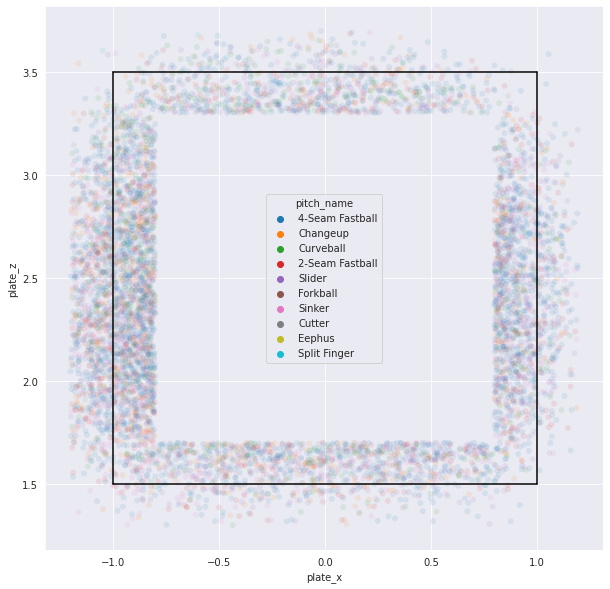

In [26]:
#결측값 삭제
edgePitches=\
(atKbo_11_18_StatCast.query(
    '(plate_x >=0.8 & plate_x <=1.2 & plate_z >=1.3 & plate_z <=3.7) | \
    (plate_x <=-0.8 & plate_x >=-1.2 & plate_z >=1.3 & plate_z <=3.7) | \
    (plate_x >=-0.8 & plate_x <=0.8 & plate_z >=1.3 & plate_z <=1.7) | \
    (plate_x >=-0.8 & plate_x <=0.8 & plate_z >=3.3 & plate_z <=3.7)').
    query('pitch_name.notnull()',engine='python').
    query('description=="called_strike"'))
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(data=edgePitches,x='plate_x',y='plate_z',hue='pitch_name',alpha=0.1)
#(x1,x2) -> (y1,y2)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')

plt.show()

- 조건에 맞는 구종을 산출해 봅시다.

In [27]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name','pitch_name']).
 count().
 head(10))


game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball          1
             4-Seam Fastball         18
             Changeup                 3
             Curveball                3
다이아몬드        2-Seam Fastball          7
             4-Seam Fastball        155
             Changeup                10
             Curveball               36
듀브론트         2-Seam Fastball         80
             4-Seam Fastball        194

- 투구들의 상대적인 비율을 산출해본다.

In [28]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name','pitch_name']).
 count().
 groupby('pitcher_name').
 apply(lambda x:x/x.sum()).
 head(10))


game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball   0.040000
             4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        2-Seam Fastball   0.033654
             4-Seam Fastball   0.745192
             Changeup          0.048077
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853

- 산출된 비율에서 10% 이상인 구종만 추출



In [29]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
 groupby(['pitcher_name','pitch_name']).
 count().
 groupby('pitcher_name').
 apply(lambda x:x/x.sum()).
 query('game_date>=0.1').
 head(10))


game_date
pitcher_name pitch_name                
니퍼트          4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        4-Seam Fastball   0.745192
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853
             Changeup          0.107330
             Curveball         0.102094
레나도          4-Seam Fastball   0.631579

- 위와 같이 추출된 데이터에 대해 투수별 행의 개수를 구하여 제구력 평가 가능

In [30]:
coordEdge=(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].
           groupby(['pitcher_name','pitch_name']).count().
           groupby('pitcher_name').apply(lambda x: x/x.sum()).
           query('game_date>=0.1').
           groupby('pitcher_name').
           count()
)
coordEdge=coordEdge.reset_index().rename(columns={'game_date':'num_pitches'})
coordEdge.head(10)

,pitcher_name,num_pitches
0,니퍼트,3
1,다이아몬드,2
2,듀브론트,4
3,레나도,2
4,레온,2
5,레이예스,2
6,레일리,4
7,로저스,3
8,루카스,2
9,린드블럼,3


In [31]:
## kbo 첫 시즌에서 어느 정도 이닝도 먹어주면서 평균자책점도 낮은 선수들 & 제구력 괜찮은 친구들
Elite_11_18=Elite_11_18.reset_index()

- 제구력이 좋을수록 era도 감소하는 것을 확인 가능

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


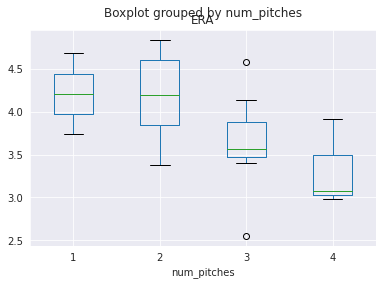

In [32]:
Elite_11_18=Elite_11_18.merge(coordEdge,on='pitcher_name')
Elite_11_18.boxplot('ERA','num_pitches')

### **선형회귀분석**

- p-value 사용하여 유의미한 분석 도출

- 통계적 모델을 통해서 선형 관계 도출

In [33]:
import statsmodels.api as sm

y=Elite_11_18.ERA.values
# 1 추가
X=sm.add_constant(Elite_11_18.num_pitches.values)

model=sm.OLS(y,X)
result=model.fit()
result.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     5.861
Date:                Wed, 22 Feb 2023   Prob (F-statistic):             0.0277
Time:                        03:13:38   Log-Likelihood:                -14.248
No. Observations:                  18   AIC:                             32.50
Df Residuals:                      16   BIC:                             34.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7731      0.414     11.543      0.000       3.896       5.650
x1            -0.3629      0.150     -2.421      0.028      -0.681      -0.045
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.346
Skew:                          -0.120   Prob(JB):                        0.841
Kurtosis:                       2.365   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



1.   독립변수 X1의 계수(coef)가 -0.3629
  - 제구력 지표가 1 상승할 때마다 era가 0.36만큼 감소
2.   p-value가 0.05보다 작으므로 유익한 결과가 나왔다고 볼 수 있음



### 아웃 확률 추정하기

- events 컬럼에는 타석별 오직 하나의 결과이고 나머지는 `nan` 
- events에 값이 기록될 때마다 batter값이 바뀐다.

In [34]:
atKbo_11_18_StatCast.tail(40)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
135713,2017-08-28,96.2,595879.0,605795,NaN,foul,7.0,R,R,NaN,...,-0.6086,1.5074,-15.5570,30.3301,-9.7024,NaN,NaN,2217.0,4-Seam Fastball,산체스
135714,2017-08-28,90.1,595879.0,605795,NaN,ball,12.0,R,R,NaN,...,0.6816,3.8059,1.8266,23.8965,-24.6036,NaN,NaN,2267.0,Cutter,산체스
135715,2017-08-28,80.8,595879.0,605795,NaN,ball,13.0,R,R,NaN,...,-0.2828,0.2954,-0.0745,21.0612,-36.1313,NaN,NaN,2331.0,Curveball,산체스
135716,2017-08-24,90.9,434158.0,605795,field_out,hit_into_play,11.0,L,R,fly_ball,...,-0.9707,2.3253,-17.3943,25.4174,-23.5127,95.5,27.0,1890.0,Changeup,산체스
135717,2017-08-24,81.3,434158.0,605795,NaN,ball,11.0,L,R,NaN,...,-0.6727,4.4818,-0.4502,19.5885,-38.3236,NaN,NaN,2224.0,Curveball,산체스
135718,2017-08-24,90.3,434158.0,605795,NaN,foul,13.0,L,R,NaN,...,-0.5243,1.0691,-15.8077,26.2685,-23.2553,NaN,NaN,1803.0,Changeup,산체스
135719,2017-08-24,91.9,434158.0,605795,NaN,ball,12.0,L,R,NaN,...,1.6330,2.3862,-5.3999,26.9635,-16.4211,NaN,NaN,2287.0,Cutter,산체스
135720,2017-08-24,90.8,434158.0,605795,NaN,blocked_ball,13.0,L,R,NaN,...,-0.7450,-0.1383,-14.3108,24.4581,-20.8675,NaN,NaN,1808.0,Changeup,산체스
135721,2017-08-24,96.3,434158.0,605795,NaN,called_strike,14.0,L,R,NaN,...,0.8341,1.9622,-16.5034,30.7509,-12.1865,NaN,NaN,2254.0,4-Seam Fastball,산체스
135722,2017-08-24,80.9,621035.0,605795,field_out,hit_into_play,1.0,R,R,fly_ball,...,-0.3699,2.8651,0.9803,22.6725,-38.9056,93.1,29.0,2357.0,Curveball,산체스


In [35]:
# 고유 batter의 정보만 남김
(atKbo_11_18_StatCast[['batter','events','description']].
 query('events.notnull()',engine='python').
 head(10))

,batter,events,description
0,425834.0,field_out,hit_into_play
1,150289.0,home_run,hit_into_play_score
7,430632.0,field_out,hit_into_play
10,446481.0,single,hit_into_play_no_out
12,446334.0,field_out,hit_into_play
15,116338.0,field_out,hit_into_play
19,110029.0,field_out,hit_into_play
25,435062.0,field_out,hit_into_play
29,488721.0,home_run,hit_into_play_score
31,430948.0,field_out,hit_into_play


- 해당 데이터를 순차적으로 순회하면서 직접 카운팅

In [56]:
#key가 없으면 만들어주고 있으면 +1해주고
def recordInning(key,dic):
    if dic.get(key)==None:
        dic[key]=1
    else:
        dic[key]+=1
    return dic

In [57]:
def getInningResult(df):
    batterCount=0
    batterCountTemp=0
    outs=['out','out','out']
    inningDict={}
# 밑에서부터 올라가면서 out이 3개 나오면 기록하는 것으로
    for idx in range(len(df)-1,-1,-1):
        batterCount+=1
# 아웃이 3번 나오면 기록하도록 합니다.  
        if 'out' in df.events.iloc[idx]:
            outs.pop()
        if len(outs)==0:
            _key=f'I_{batterCount-batterCountTemp}'
            inningDict=recordInning(_key,inningDict)
            batterCountTemp=batterCount
            if idx!=0:
                outs=['out','out','out']
    if len(outs)!=0:
        _key=f'I_{batterCount-batterCountTemp+len(outs)}'
        inningDict=recordInning(_key,inningDict)
    return pd.DataFrame(data=dict(sorted(inningDict.items())),index=[0])            


In [58]:
MLB_11_18_InningSummary=atKbo_11_18_StatCast.query('events.notnull()',engine='python').groupby(['pitcher_name','game_date']).apply(getInningResult)
MLB_11_18_InningSummary

I_6  I_7  I_4  I_5  I_8  I_3  I_12  I_10  I_9  \
pitcher_name game_date                                                     
니퍼트          2010-06-06 0  2.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-09 0  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-17 0  NaN  NaN  1.0  1.0  1.0  NaN   NaN   NaN  NaN   
             2010-06-23 0  1.0  1.0  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-30 0  1.0  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   
...                        ...  ...  ...  ...  ...  ...   ...   ...  ...   
헥터           2015-06-06 0  1.0  NaN  NaN  2.0  NaN  NaN   NaN   NaN  NaN   
             2015-06-15 0  NaN  NaN  1.0  1.0  NaN  NaN   NaN   NaN  NaN   
후랭코프         2017-06-09 0  1.0  NaN  NaN  1.0  NaN  NaN   NaN   NaN  NaN   
휠러           2017-05-30 0  NaN  1.0  NaN  1.0  NaN  NaN   NaN   NaN  NaN   
             2017-05-31 0  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN  NaN   

                           I_11  I_14  I_13  I_17  I_16  
pitcher_name game_date                                   
니퍼트          2010-06-06 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-09 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-17 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-23 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-30 0   NaN   NaN   NaN   NaN   NaN  
...                         ...   ...   ...   ...   ...  
헥터           2015-06-06 0   NaN   NaN   NaN   NaN   NaN  
             2015-06-15 0   1.0   NaN   NaN   NaN   NaN  
후랭코프         2017-06-09 0   NaN   NaN   NaN   NaN   NaN  
휠러           2017-05-30 0   NaN   NaN   NaN   NaN   NaN  
             2017-05-31 0   NaN   NaN   NaN   NaN   NaN  

[3090 rows x 14 columns]

- statcast data를 groupby 한 후 getInningResult함수를 적용하면 경기별 이닝 결과가 산출돼 출력된다

In [59]:
MLB_11_18_InningSummary=(MLB_11_18_InningSummary.groupby('pitcher_name').sum()[sorted(MLB_11_18_InningSummary.columns)])

In [60]:
Elite_11_18_InningSummary=(MLB_11_18_InningSummary.query('pitcher_name in @Elite_11_18.pitcher_name')
                           )
Elite_11_18_InningSummary.reset_index(drop=True)

,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
1,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,24.0,17.0,10.0,9.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,6.0,6.0,1.0,3.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,41.0,35.0,15.0,9.0,2.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,49.0,12.0,21.0,6.0,2.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,13.0,20.0,8.0,5.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,11.0,6.0,4.0,3.0,1.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,11.0,11.0,2.0,2.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,2.0,2.0,0.0


In [61]:
Elite_11_18_InningSummary

,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
pitcher_name,,,,,,,,,,,,,,
니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
다이아몬드,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
레이예스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,24.0,17.0,10.0,9.0,5.0
레일리,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,6.0,6.0,1.0,3.0,2.0
린드블럼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,41.0,35.0,15.0,9.0,2.0,1.0
보우덴,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,49.0,12.0,21.0,6.0,2.0,1.0
샘슨,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,13.0,20.0,8.0,5.0,2.0
세든,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,11.0,6.0,4.0,3.0,1.0
소사,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,11.0,11.0,2.0,2.0,0.0


- 총 18명의 투수 정보가 추출되었음